In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
'''
Close is the standard choice for price-over-time charts. It's the final traded price when the market closes for the day — it represents the settled consensus
price and is what most people mean when they say "the stock was at $X."

Quick breakdown of when you'd use the others:
- Open — price at market open, useful for gap analysis (overnight moves)                                                                                            
- High/Low — intraday range, useful for volatility analysis
- Close — the go-to for trend/performance charts
'''

# Load the data from the CSV files and parse the 'Date' column as datetime objects
appl_df = pd.read_csv('../data/AAPL_data.csv', parse_dates=['Date'])
msft_df = pd.read_csv('../data/MSFT_data.csv', parse_dates=['Date'])
qqq_df = pd.read_csv('../data/QQQ_data.csv', parse_dates=['Date'])
spy_df = pd.read_csv('../data/SPY_data.csv', parse_dates=['Date'])
tsla_df = pd.read_csv('../data/TSLA_data.csv', parse_dates=['Date'])

# appl_df.plot(kind='line', x='Date', y='Close')
# plt.show()

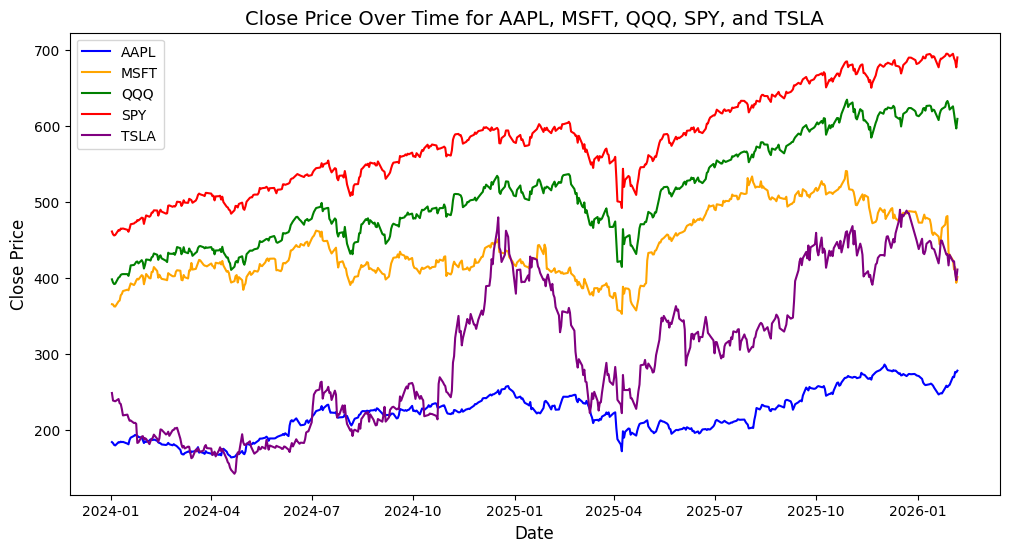

In [19]:
# Create a line plot for the 'Close' price over time for each stock
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the 'Close' price for each stock
ax.plot(appl_df['Date'], appl_df['Close'], label='AAPL', color='blue')
ax.plot(msft_df['Date'], msft_df['Close'], label='MSFT', color='orange')
ax.plot(qqq_df['Date'], qqq_df['Close'], label='QQQ', color='green')
ax.plot(spy_df['Date'], spy_df['Close'], label='SPY', color='red')
ax.plot(tsla_df['Date'], tsla_df['Close'], label='TSLA', color='purple')

# Set labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Close Price', fontsize=12)
ax.set_title('Close Price Over Time for AAPL, MSFT, QQQ, SPY, and TSLA', fontsize=14)
ax.legend()
plt.show()

# Visualizing Volume Patterns

### What is Volume?
**Volume** = the number of shares that was traded during a specified time period (in my case, each day). High volume means lots of buying/ selling activity, low volume means quiet trading.

### Why Volume Matters
Volume gives us the context about price movements:
- High volume + price increase = Strong buying conviction (bullish signal)
- High volume + price decrease = Strong selling pressure (bearish signal)
- Low volume + price movement = Weak signal, might reverse easily
- Volume spikes = Something important happened (news, earnings, etc.)

A way to think of it: If a stock jumps 5% on 100 shares traded, that's not meaningful. But if it jumps 5% on 10 million shares? That's a real move.

#### Volume Ratio Feature
We might create: ``` volume_ratio = today_volume/ avg_volume ```
- Ratio = 1.0 → Normal day
- Ratio = 2.5 → 2.5x more activity than usual (something's up!)
- Ratio = 0.3 → Very quiet (30% of normal)

#### What We'll Learn By Looking at Volume
After visualizing a few stocks, we'll start noticing:
1. Earnings days = massive volume spikes
2. Trending stocks = consistently higher volume
3. Dead stocks = low, flat volume (boring, might skip these)
4. News events = sudden spikes you can cross-reference with headlines
5. Institutional buying = gradual volume increase over weeks

#### Quick Volume Rules of Thumb
✅ Good signals:

- Volume confirms price direction
- Volume increases on breakouts
- Steady volume during trends

❌ Warning signs:

- Price moves but volume doesn't follow
- Very low volume (hard to trade)
- Random spikes with no pattern

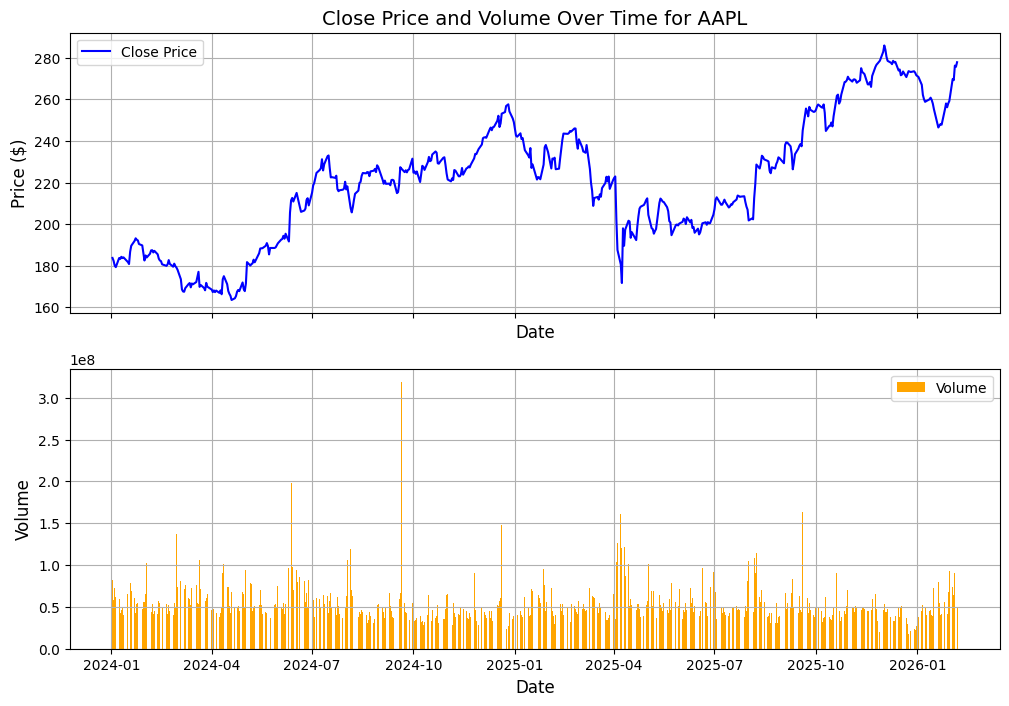

In [32]:
def visualize_basic_volume(stock_data, stock_name=None):
    # Create figure with 2 subplots: one for volume and one for close price
    # Share x-axis for both subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    ax1.set_title(f'Close Price and Volume Over Time for {stock_name}', fontsize=14)
    # Top subplot: Price chart
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True)
    ax1.legend()

    # Bottom subplot: Volume chart
    ax2.bar(stock_data['Date'], stock_data['Volume'], label='Volume', color='orange')
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.grid(True)
    ax2.legend()

    # Display the figure
    plt.show()


visualize_basic_volume(appl_df, stock_name='AAPL')
# visualize_basic_volume(msft_df, stock_name='MSFT')
# visualize_basic_volume(qqq_df, stock_name='QQQ')
# visualize_basic_volume(spy_df, stock_name='SPY')
# visualize_basic_volume(tsla_df, stock_name='TSLA')

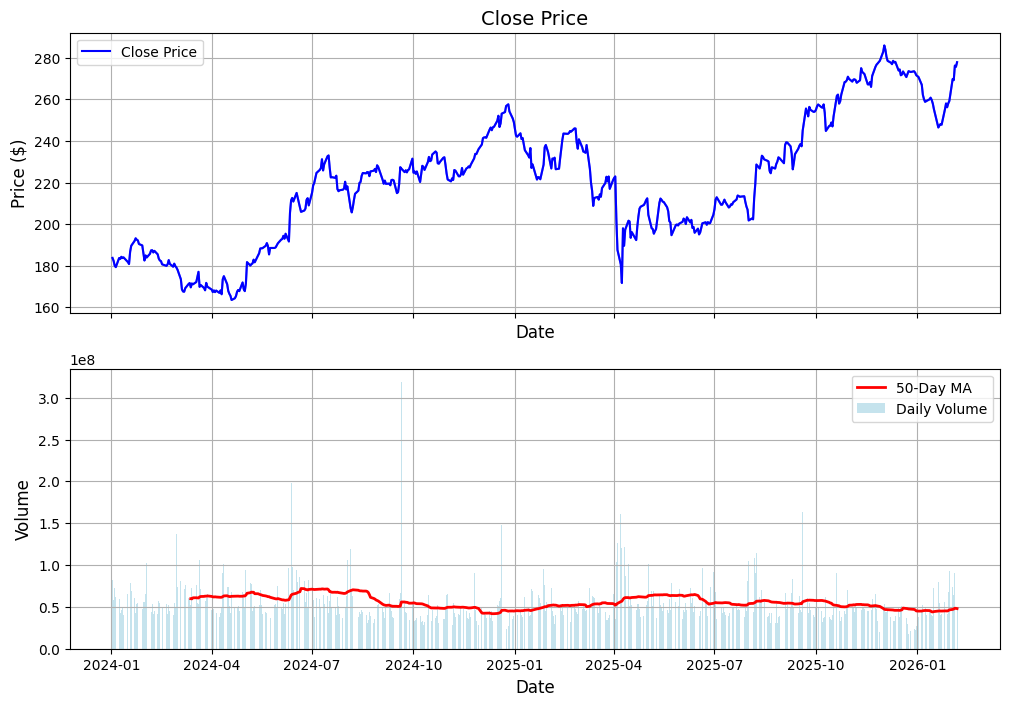

In [65]:
def visualize_volume_with_average(stock_data, stock_name=None, window_size=20):
    # calculate volume moving average
    stock_data['Volume_MA'] = stock_data['Volume'].rolling(window=window_size).mean()

    # Create figure with 2 subplots: one for volume and one for close price
    # Share x-axis for both subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Top subplot: Price chart
    ax1.set_title(f'Close Price', fontsize=14)
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    ax1.set_xlabel('Date', fontsize=12)
    ax1.set_ylabel('Price ($)', fontsize=12)
    ax1.grid(True)
    ax1.legend()

    # Bottom subplot: Volume + Moving Average
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
    ax2.bar(stock_data['Date'], stock_data['Volume'], label='Daily Volume', color='lightblue', alpha=0.7)
    ax2.plot(stock_data['Date'], stock_data['Volume_MA'], label=f'{window_size}-Day MA', color='red', linewidth=2)
    
    ax2.set_xlabel('Date', fontsize=12)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.grid(True)
    ax2.legend()

    # Display the figure
    plt.show()

visualize_volume_with_average(appl_df, stock_name='AAPL', window_size=50)

#### Observations
Honestly, at first I couldn't see a pattern. This is my first time looknig at any financial data at this scale so I was a bit lost at how to even looks or consume the data. I was speaking with my friend Brianna Hinds, ML Engineer, and she mentioned combining the two subplots and overlaying them to one plot which led to my next graph.

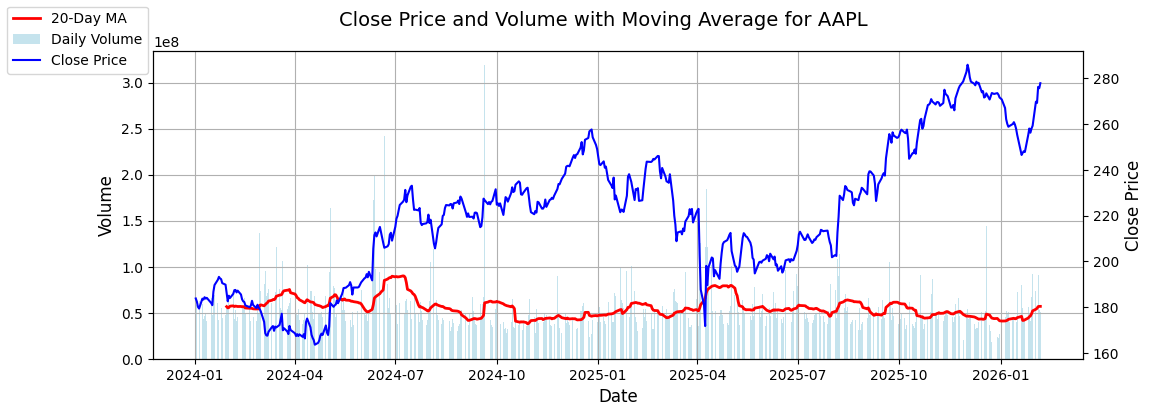

In [95]:
def visualize_volume_with_average_double_y(stock_data, stock_name=None, window_size=20):
    # calculate volume moving average
    stock_data['Volume_MA'] = stock_data['Volume'].rolling(window=window_size).mean()

    # Create figure with a plot showing both volume and close price on the same subplot with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Bottom subplot: Volume + Moving Average
    ax1.plot(stock_data['Date'], stock_data['Volume_MA'], label=f'{window_size}-Day MA', color='red', linewidth=2)
    ax1.bar(stock_data['Date'], stock_data['Volume'], label='Daily Volume', color='lightblue', alpha=0.7)
    ax1.set_ylabel('Volume', fontsize=12)
    ax1.set_xlabel('Date', fontsize=12)

    ax2 = ax1.twinx()
    ax2.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
    ax2.set_ylabel('Close Price', fontsize=12)
    
    ax1.grid(True)
    fig.legend(loc='upper left')
    fig.suptitle(f'Close Price and Volume with Moving Average for {stock_name}', fontsize=14)

    # Display the figure
    plt.show()

visualize_volume_with_average_double_y(appl_df, stock_name='AAPL')

# visualize_volume_with_average(msft_df, stock_name='MSFT')
# visualize_volume_with_average(qqq_df, stock_name='QQQ')
# visualize_volume_with_average(spy_df, stock_name='SPY')
# visualize_volume_with_average(tsla_df, stock_name='TSLA')

#### Observation
Now, this graph made it a lot easier to see trends and patterns. I'm able to see certain cases in which the price the prices dipped but then the volume of trades increased and vice versa. This is also the point in which I noticed a massive spike around September 2024. Initially I did not know what month/day the spike was at so I simply got the max volume and found when that max volume occured. I got curious about waht happened 9/20/2024 to cause 318679900 trades to happen. This pushed me to reaserch that time period with Apple to see what happened.

After some research, I was able to find a couple things:
1. **Quadruple Witching Day**

    The biggest fator was "Quadruple Witching Day." In short, this happens only 4 times a year (the 3rd Friday of March, June, Setember, and December). This is the simultaneous expiration of:
    - Stock Options
    - Stock Index Options
    - Stock Index Futures
    - Single-stock Futures

    On these days, institutional investors and hedge funds are forced to either 
    1. close out their positions or
    2. "roll" them over into the next quarter.
    
    Since Apple is one of the most heavily traded options stocks in the world, this always creates a massive surge in volume as the market "cleans house."

2. **S&P 500 & Index Rebalancing**

    Major indices (index fund/ portfolio) like the S&P 500 and the Nasdaq-100 perform their quarterly rebalancing on this same Friday.
    - The Mechanic: Index funds and ETFs (like SPY or VOO) must adjust their holdings to match the new weights assigned by the index providers.
    - The Impact: Since Apple is a cornerstone of these indices, billions of dollars worth of $AAPL shares had to be bought or sold by passive funds in a single afternoon to ensure they remained perfectly balanced before the market opened again on Monday.

3. **iPhone 16 Launch Day**

    By coincidence, September 20, 2024, was also the official retail launch date for the iPhone 16 series.
    - This is typically a high-activity day for Apple as investors monitor "feet on the ground" at Apple stores and early sales reports.
    - Around this time, there were also analyst reports (notably from Ming-Chi Kuo) suggesting that pre-order demand for the iPhone 16 Pro models was lower than expected. This specific news likely added a layer of active trading (selling) on top of the automated "witching" volume.

#### Summary:
This seems to be textbook example of how institutional mechanics dwarf "normal" trading:

| Date | Day | Volume |	Event |
|---|---|---|---|
| 9/19 | Thursday |	~66.7M | Normal Trading |
| 9/20 | Friday | ~318.6M |	Quad Witching + Rebalancing + iPhone Launch |
| 9/23 | Monday | ~54.1M | Post-rebalance "Quiet" |


#### Next Steps
Given that **Quadruple Witching Day** happens every 3rd Friday of March, June, September, and December, I wanted to see if this same pattern (where friday has the highest volume) persists

In [88]:
max_volume_date = appl_df.loc[appl_df['Volume'].idxmax(), 'Date']
print(f"Date with the highest trading volume for AAPL: {max_volume_date.date()} with volume {appl_df['Volume'].max()}")

Date with the highest trading volume for AAPL: 2024-09-20 with volume 318679900


In [90]:
def get_quarterly_third_fridays(start_date, end_date):
    """
    Generates a list of third Fridays for March, June, September, and December 
    between a start and end date using pandas.
    """
    # Generate a date range for every third Friday of every month ("WOM-3FRI")
    # "WOM-3FRI" stands for "Week Of Month", 3rd Friday.
    third_fridays_all = pd.date_range(start=start_date, end=end_date, freq='WOM-3FRI')
    
    # Filter the dates to keep only the desired months: March (3), June (6), September (9), December (12)
    quarterly_third_fridays = third_fridays_all[third_fridays_all.month.isin([3, 6, 9, 12])]
    
    return quarterly_third_fridays.tolist()

start_year = 2024
end_year = 2026
start_date = f'{start_year}-01-02'
end_date = f'{end_year}-02-09'

dates = get_quarterly_third_fridays(start_date, end_date)
print("Quarterly third Fridays between", start_date, "and", end_date)
for date in dates:
    print(date.strftime('%Y-%m-%d'))

Quarterly third Fridays between 2024-01-02 and 2026-02-09
2024-03-15
2024-06-21
2024-09-20
2024-12-20
2025-03-21
2025-06-20
2025-09-19
2025-12-19


In [93]:
print(f"From 01/01/2024 to 02/09/2026, the maximum volume traded was: {appl_df['Volume'].max()}")
print(f"Date of maximum volume traded: {appl_df['Date'][appl_df['Volume'].idxmax()]}")

print(f"Volumes traded on the 3rd Friday of September: {appl_df['Volume'][appl_df['Date'] == '2024-09-20'].values[0]}")
print()

for date in dates:
    if date in appl_df['Date'].values:
        index = appl_df[appl_df['Date'] == date].index[0]

        volume_day_before = appl_df['Volume'].iloc[index - 1]
        volume = appl_df['Volume'].iloc[index]
        volume_day_after = appl_df['Volume'].iloc[index + 1]

        day_before_date = appl_df['Date'].iloc[index - 1]
        day_of_date = appl_df['Date'].iloc[index]
        day_after_date = appl_df['Date'].iloc[index + 1]

        print(f"Volume traded on {day_before_date.strftime('%Y-%m-%d')} (Business Day Before): {volume_day_before}")
        print(f"Volume traded on {day_of_date.strftime('%Y-%m-%d')}: {volume}")
        print(f"Volume traded on {day_after_date.strftime('%Y-%m-%d')} (Business Day After): {volume_day_after}")
        print(f"Change from day before to day of: {volume - volume_day_before} ({((volume - volume_day_before) / volume_day_before) * 100:.2f}%)")
        print()

From 01/01/2024 to 02/09/2026, the maximum volume traded was: 318679900
Date of maximum volume traded: 2024-09-20 00:00:00
Volumes traded on the 3rd Friday of September: 318679900

Volume traded on 2024-03-14 (Business Day Before): 72913500
Volume traded on 2024-03-15: 121752700
Volume traded on 2024-03-18 (Business Day After): 75604200
Change from day before to day of: 48839200 (66.98%)

Volume traded on 2024-06-20 (Business Day Before): 86172500
Volume traded on 2024-06-21: 241805100
Volume traded on 2024-06-24 (Business Day After): 80727000
Change from day before to day of: 155632600 (180.61%)

Volume traded on 2024-09-19 (Business Day Before): 66781300
Volume traded on 2024-09-20: 318679900
Volume traded on 2024-09-23 (Business Day After): 54146000
Change from day before to day of: 251898600 (377.20%)

Volume traded on 2024-12-19 (Business Day Before): 60882300
Volume traded on 2024-12-20: 147495300
Volume traded on 2024-12-23 (Business Day After): 40858800
Change from day before t

#### Observation
After looking at the 4 quarters for 2 years (8 total quarters) it was obvious that **Quadruple Witching Day** plays a massive role in those spikes seen in the graph. Now, this is apparent in Apple stock, next I wanted to check this pattern for the other ETF's and stocks.

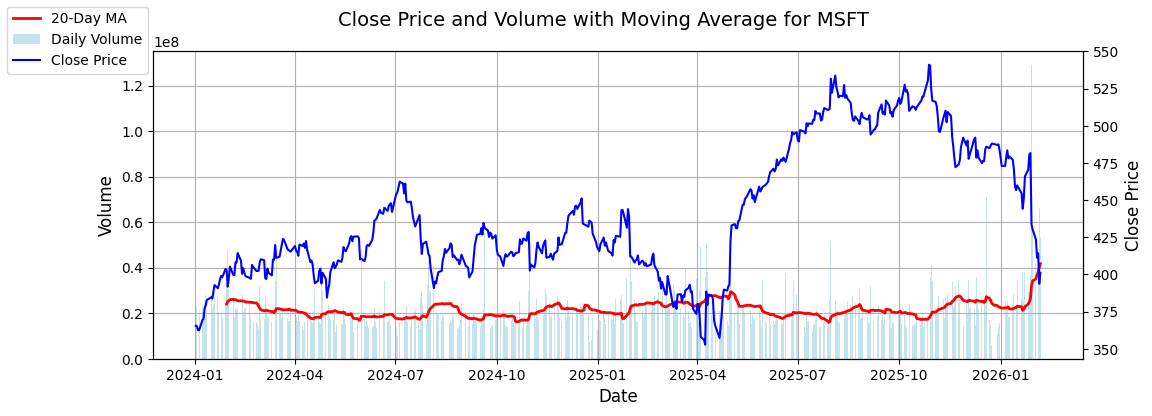

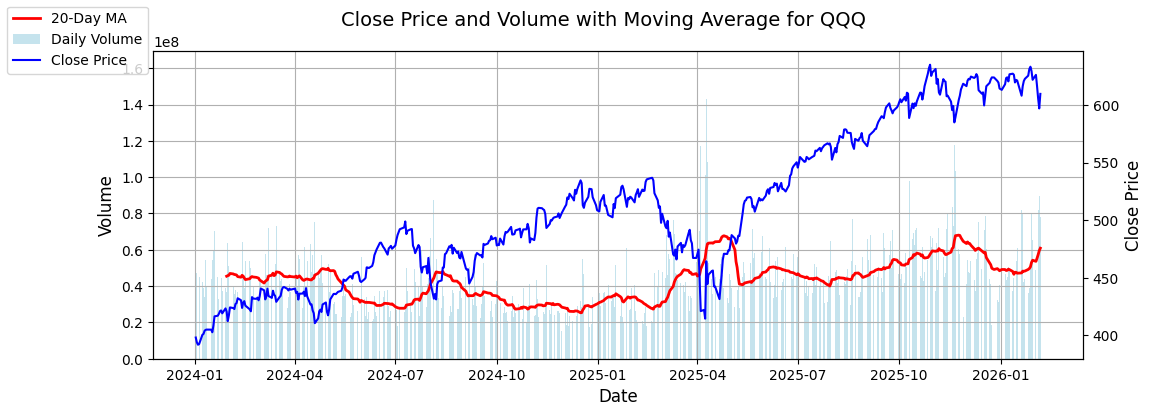

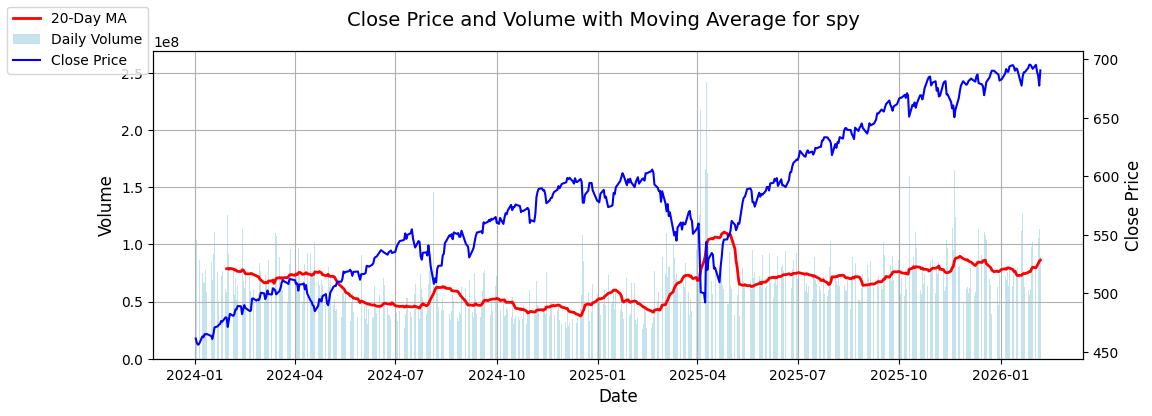

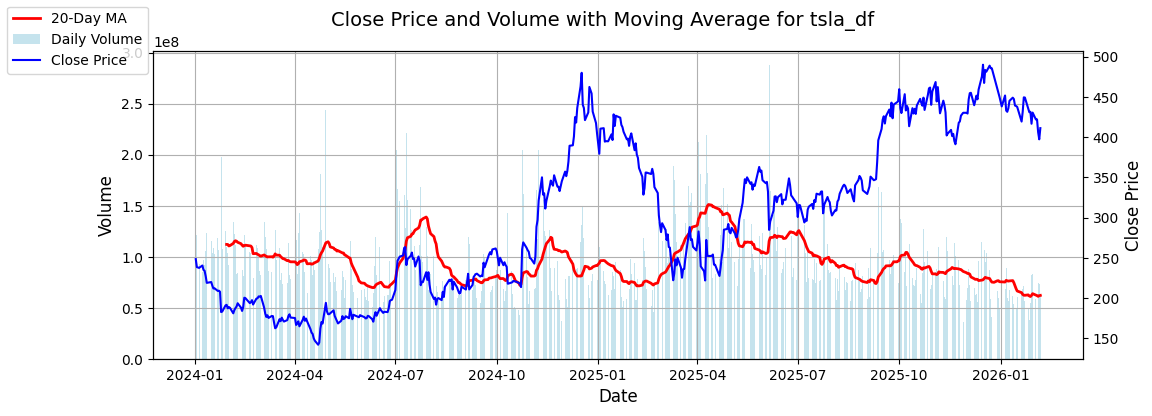

In [96]:
visualize_volume_with_average_double_y(msft_df, stock_name='MSFT')
visualize_volume_with_average_double_y(qqq_df, stock_name='QQQ')
visualize_volume_with_average_double_y(spy_df, stock_name='spy')
visualize_volume_with_average_double_y(tsla_df, stock_name='tsla_df')